In [7]:
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


In [8]:
(X_train , y_train), (X_test , y_test) = tf.keras.datasets.cifar10.load_data()

In [9]:
print('Training Images : {}'.format(X_train.shape))
print('Testing Images : {}'.format(X_test.shape))

Training Images : (50000, 32, 32, 3)
Testing Images : (10000, 32, 32, 3)


In [10]:
print(X_train[0].shape)

(32, 32, 3)


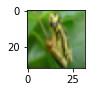

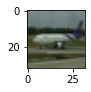

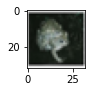

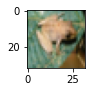

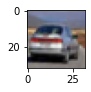

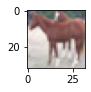

In [11]:
for i in range(232,238):
    plt.subplot(120+ 1 + i)
    img = X_train[i]
    plt.imshow(img)
    plt.show()

# Preprocessing the data

In [12]:

X_train = X_train.reshape(X_train.shape[0], 32,32,3) 
X_test= X_test.reshape(X_test.shape[0], 32,32,3) 
X_train =X_train.astype('float32')
X_test =X_test.astype('float32')

X_train /=255
X_test /= 255
n_classes= 10

print("Shape before one-hot emcoding: ", y_train.shape)
Y_train = utils.to_categorical(y_train , n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot emcoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


# Building Model

In [13]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense , Dropout, Conv2D, MaxPool2D, Flatten

In [14]:
model =Sequential()
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu',input_shape=(32,32,3)))


model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())



In [15]:
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation= 'relu'))
model.add(Dropout(0.3))

In [16]:
model.add(Dense(10, activation='softmax'))



In [17]:
model.compile(loss="categorical_crossentropy",
 metrics = ["accuracy"] ,
 optimizer="adam",)

In [18]:
model.fit(X_train, Y_train,batch_size=128, epochs=20 , validation_data=(X_test, Y_test))

Epoch 1/20
391/391 [==============================] - 196s 498ms/step - loss: 1.6102 - accuracy: 0.4071 - val_loss: 1.1593 - val_accuracy: 0.5859
Epoch 2/20
391/391 [==============================] - 181s 463ms/step - loss: 1.1436 - accuracy: 0.5928 - val_loss: 0.9676 - val_accuracy: 0.6662
Epoch 3/20
391/391 [==============================] - 179s 457ms/step - loss: 0.9543 - accuracy: 0.6660 - val_loss: 0.8299 - val_accuracy: 0.7181
Epoch 4/20
391/391 [==============================] - 180s 459ms/step - loss: 0.8378 - accuracy: 0.7099 - val_loss: 0.7769 - val_accuracy: 0.7262
Epoch 5/20
391/391 [==============================] - 178s 455ms/step - loss: 0.7490 - accuracy: 0.7386 - val_loss: 0.7063 - val_accuracy: 0.7501
Epoch 6/20
391/391 [==============================] - 171s 436ms/step - loss: 0.6792 - accuracy: 0.7649 - val_loss: 0.6975 - val_accuracy: 0.7594
Epoch 7/20
391/391 [==============================] - 167s 426ms/step - loss: 0.6194 - accuracy: 0.7839 - val_loss: 0.7258 -

In [19]:
classes = range(0,10)

names = ['airplane', 'automobile',' bird','cat','deer','dog',' frog','horse','ship','truck']

class_labels= dict(zip(classes, names))

batch =X_test[100:109]
labels= np.argmax(Y_test[100:109], axis=-1)

predictions= model.predict(batch, verbose= 1)

1/1 [==============================] - 0s 177ms/step


In [20]:
 print(predictions)

[[4.17219708e-05 5.84261761e-06 1.15672894e-01 1.58964898e-02
  7.94193387e-01 3.69097330e-02 1.15743873e-03 3.60470973e-02
  2.18758178e-05 5.34930405e-05]
 [1.79029259e-04 1.20661825e-05 9.87365935e-03 1.58140212e-01
  9.16791055e-03 7.35984385e-01 5.46631310e-03 8.05606768e-02
  1.46098799e-04 4.69589082e-04]
 [2.24697451e-05 6.55911746e-04 4.57152317e-04 3.17569426e-03
  7.12560781e-04 1.15704667e-02 9.73232388e-01 9.50574968e-03
  2.35378859e-04 4.32347879e-04]
 [4.21632174e-10 2.33902689e-11 6.89055969e-06 9.99656320e-01
  4.64932527e-05 1.83577467e-05 2.71260651e-04 6.49486367e-07
  2.22807536e-10 9.62483142e-08]
 [3.58993599e-11 9.99995112e-01 1.02683433e-15 9.51987344e-17
  1.76266522e-18 8.54606448e-18 3.94160921e-14 8.87139891e-17
  5.32439444e-08 4.86225645e-06]
 [5.72441223e-08 9.98917818e-01 8.48090576e-09 1.61980452e-07
  3.14672344e-10 8.13869194e-10 3.21238467e-08 2.56180164e-11
  3.83154809e-04 6.98800955e-04]
 [4.37255716e-03 1.07853571e-02 8.99230968e-03 4.97206241e

In [21]:
for image in predictions:
    print(np.sum(image))

1.0
0.9999999
1.0000001
1.0000001
1.0
1.0
1.0
0.9999999
1.0000001


In [33]:
class_result=np.argmax(predictions,axis=-1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


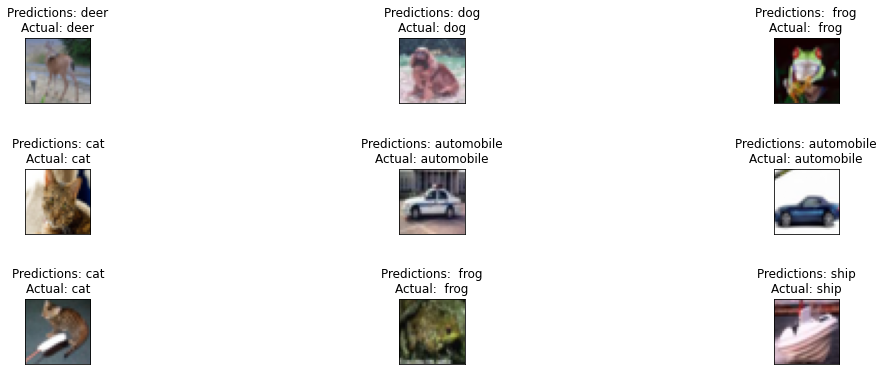

In [34]:
fig, axis =plt.subplots(3,3,figsize= (19,6))
fig.subplots_adjust(hspace=1)
axs=axis.flatten()




for i,img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title= 'Predictions: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    axs[i].imshow(img) 

plt.show()           
  
